Caricamento delle feature per il tipo di dato INFRA...
Generazione della matrice di correlazione per il tipo di dato INFRA...
Matrice di correlazione per INFRA salvata in infra_correlation_matrix.csv


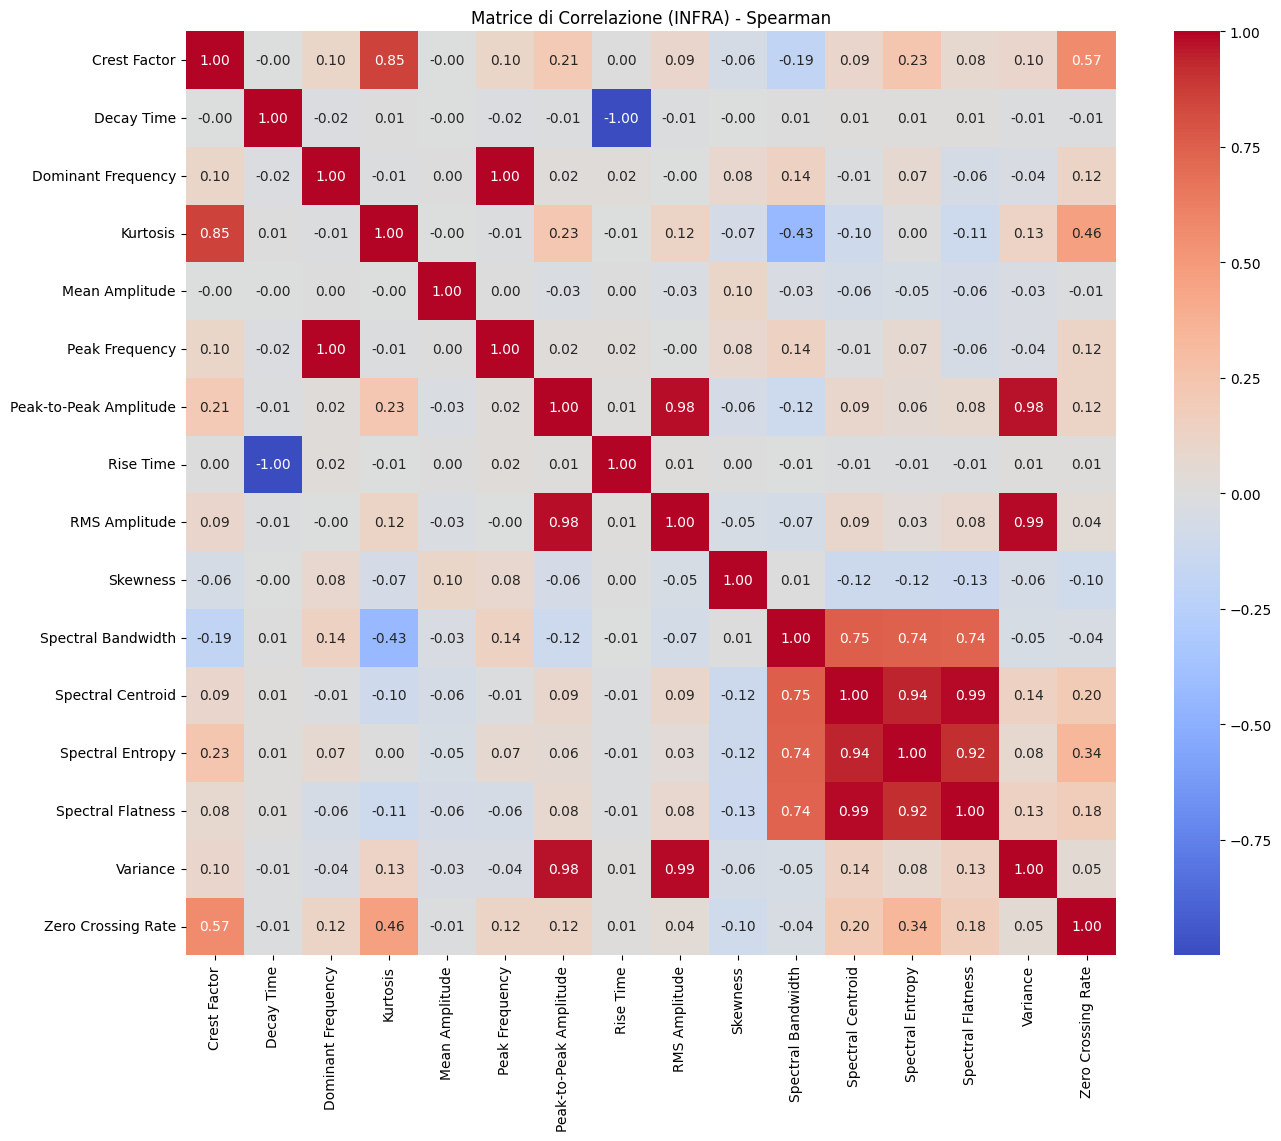

Caricamento delle feature per il tipo di dato SEISMIC...
Generazione della matrice di correlazione per il tipo di dato SEISMIC...
Matrice di correlazione per SEISMIC salvata in seismic_correlation_matrix.csv


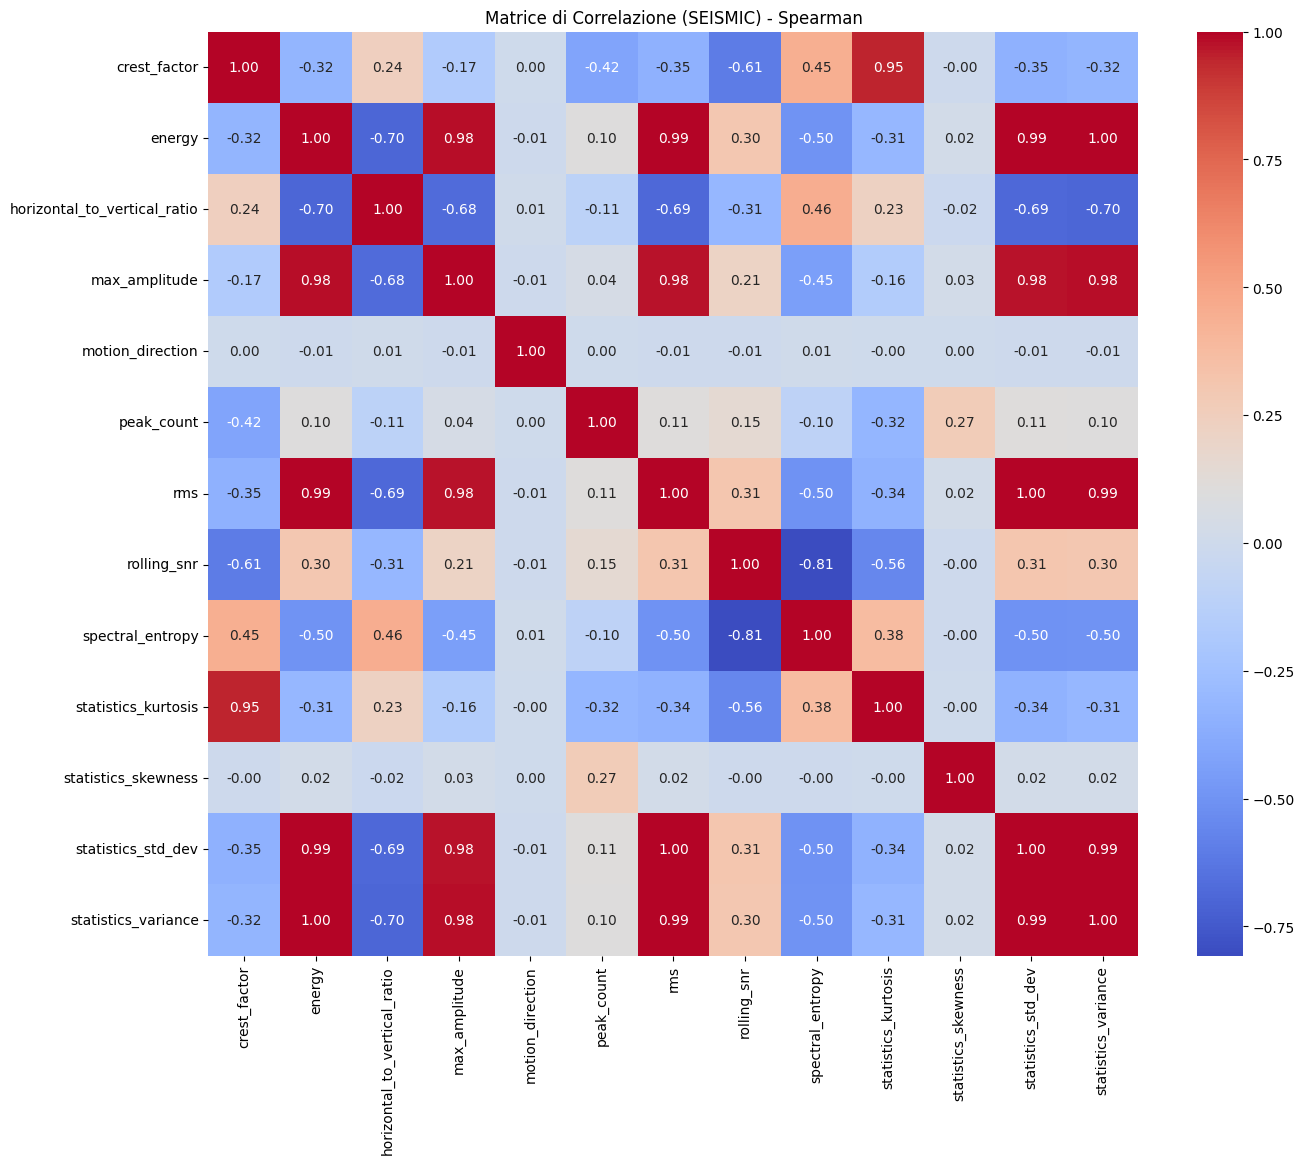

Caricamento delle feature per il tipo di dato TILT...
Generazione della matrice di correlazione per il tipo di dato TILT...
Matrice di correlazione per TILT salvata in tilt_correlation_matrix.csv


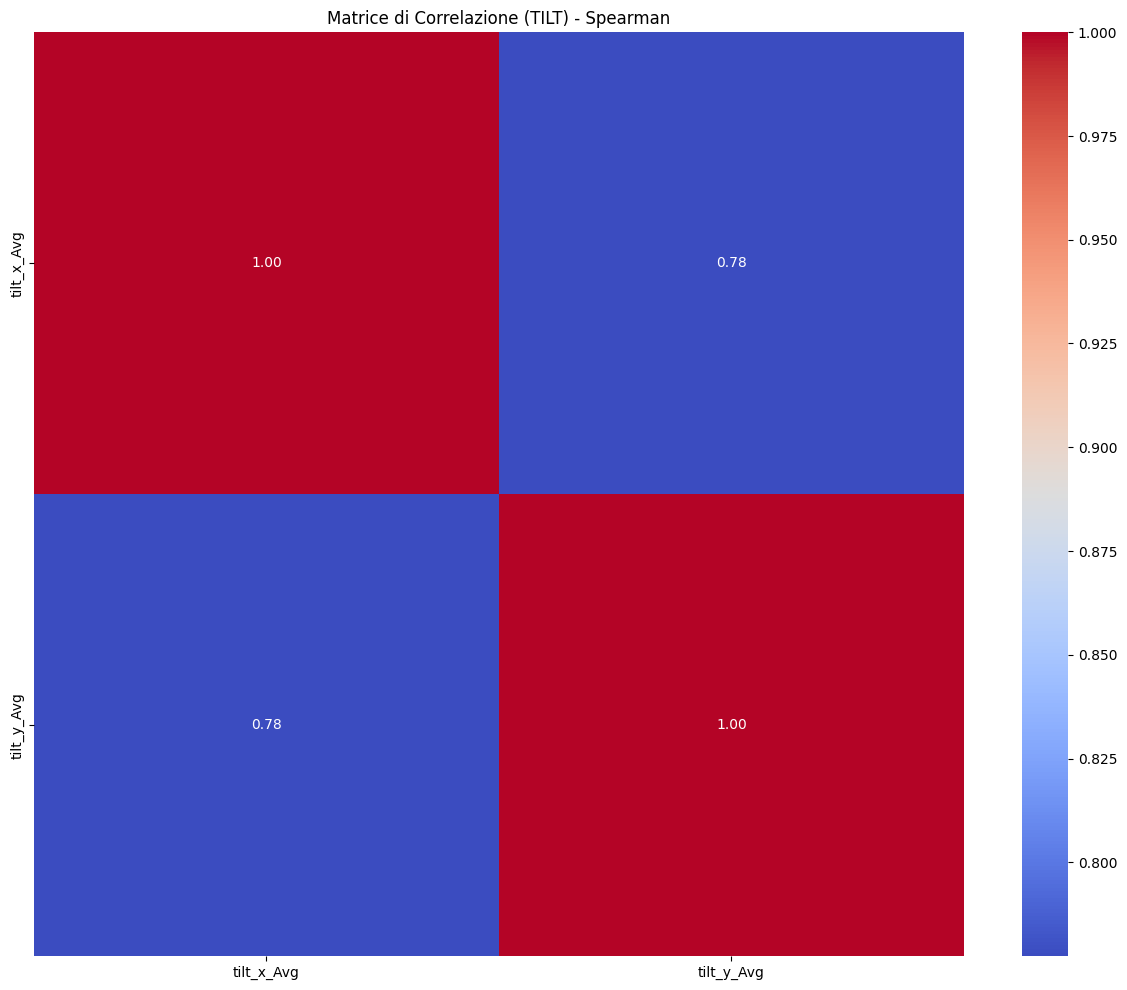

Analisi completata!


In [28]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

BASE_PATH = "data/final"  


def load_features_with_aggregation(base_path, data_type):
    aggregated_features = {}
    for station in os.listdir(base_path):  # ECNE, ECPN, etc.
        station_path = os.path.join(base_path, station)
        if os.path.isdir(station_path) and not station.startswith("."):  # Ignora directory nascoste
            for feature_file in os.listdir(station_path):  # .pkl files
                if (data_type == "INFRA" and feature_file.endswith("_cleaned.pkl")) or \
                   (data_type in ["SEISMIC", "TILT"] and feature_file.endswith(".pkl")):
                    feature_path = os.path.join(station_path, feature_file)
                    try:
                        df = pd.read_pickle(feature_path)
                        feature_name = feature_file.split('_cleaned.pkl')[0] if data_type == "INFRA" else feature_file.split('.pkl')[0]
                        if isinstance(df, pd.Series):  # Se il file è una Series
                            df = df.to_frame(name=feature_name)
                        elif isinstance(df, pd.DataFrame):  # Se è un DataFrame
                            df = df.select_dtypes(include=[np.number])  # Mantieni solo colonne numeriche
                            if not df.empty:
                                df.columns = [f"{feature_name}_{i}" for i in range(df.shape[1])]
                            else:
                                print(f"    Attenzione: il file {feature_file} non contiene dati numerici e verrà ignorato.")
                                continue

                        if feature_name not in aggregated_features:
                            aggregated_features[feature_name] = []
                        aggregated_features[feature_name].append(df)
                    except Exception as e:
                        print(f"    Errore durante il caricamento del file {feature_file}: {e}")

    combined_features = []
    for feature_name, dfs in aggregated_features.items():
        try:
            combined_df = pd.concat(dfs, axis=1).mean(axis=1).to_frame(name=feature_name)  # Calcola la media delle feature
            combined_features.append(combined_df)
        except Exception as e:
            print(f"    Errore durante l'aggregazione della feature {feature_name}: {e}")

    if combined_features:
        return pd.concat(combined_features, axis=1)
    else:
        print("Attenzione: nessuna feature trovata.")
        return pd.DataFrame()

# Funzione per calcolare e visualizzare la matrice di correlazione per ciascun tipo di dato
def generate_correlation_matrix(data_type, base_path):
    print(f"Caricamento delle feature per il tipo di dato {data_type}...")
    data_type_path = os.path.join(base_path, data_type)
    aggregated_features = load_features_with_aggregation(data_type_path, data_type)

    if not aggregated_features.empty:  # Controlla se la lista non è vuota
        data_aggregated = aggregated_features.select_dtypes(include=[np.number])  # Considera tutte le feature numeriche

        print(f"Generazione della matrice di correlazione per il tipo di dato {data_type}...")
        correlation_matrix = data_aggregated.corr(method='spearman')
        correlation_csv_path = f"{data_type.lower()}_correlation_matrix.csv"
        correlation_matrix.to_csv(correlation_csv_path)
        print(f"Matrice di correlazione per {data_type} salvata in {correlation_csv_path}")

        # Visualizza la matrice di correlazione con valori
        plt.figure(figsize=(15, 12))
        sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
        plt.title(f"Matrice di Correlazione ({data_type}) - Spearman")
        plt.show()
    else:
        print(f"Nessuna feature valida trovata per generare la matrice di correlazione per {data_type}.")

# Genera le matrici di correlazione per ciascun tipo di dato
for data_type in ["INFRA", "SEISMIC", "TILT"]:
    generate_correlation_matrix(data_type, BASE_PATH)

print("Analisi completata!")



Caricamento delle feature per il tipo di dato INFRA...
Accorpamento delle feature tra stazioni per INFRA...
Addestramento del modello Random Forest per INFRA...
Importanza delle feature per INFRA:
                        Feature  Importance
56           RMS Amplitude_ESLN    0.052825
53          Peak Frequency_ESLN    0.051223
59       Spectral Centroid_ESLN    0.049498
62                Variance_ESLN    0.048528
22  Peak-to-Peak Amplitude_ECPN    0.044081
..                          ...         ...
39               Rise Time_EPDN    0.002518
1               Decay Time_ECNE    0.002516
17              Decay Time_ECPN    0.002447
7                Rise Time_ECNE    0.002429
23               Rise Time_ECPN    0.002299

[64 rows x 2 columns]
Lista delle feature salvata in 'feature_importances_INFRA.csv'.


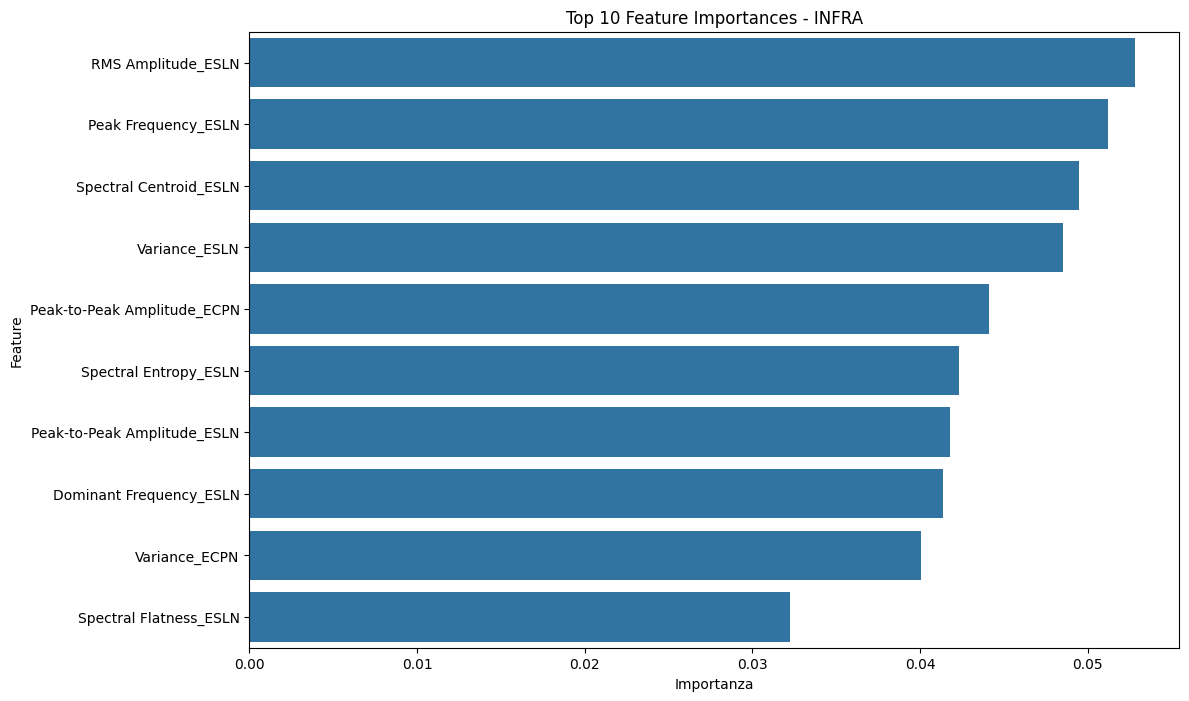

Valutazione del modello per INFRA...
Accuratezza del modello per INFRA: 99.70%
Caricamento delle feature per il tipo di dato SEISMIC...
Accorpamento delle feature tra stazioni per SEISMIC...
Addestramento del modello Random Forest per SEISMIC...
Importanza delle feature per SEISMIC:
                         Feature  Importance
27               energy.pkl_ECPN    0.107886
38  statistics_variance.pkl_ECPN    0.102441
58                  rms.pkl_ESLN    0.080899
53               energy.pkl_ESLN    0.079263
51  statistics_variance.pkl_EPDN    0.069167
..                           ...         ...
10   statistics_skewness.pkl_AIO    0.001884
31           peak_count.pkl_ECPN    0.001254
57           peak_count.pkl_ESLN    0.001175
5             peak_count.pkl_AIO    0.001076
18           peak_count.pkl_ECNE    0.001059

[65 rows x 2 columns]
Lista delle feature salvata in 'feature_importances_SEISMIC.csv'.


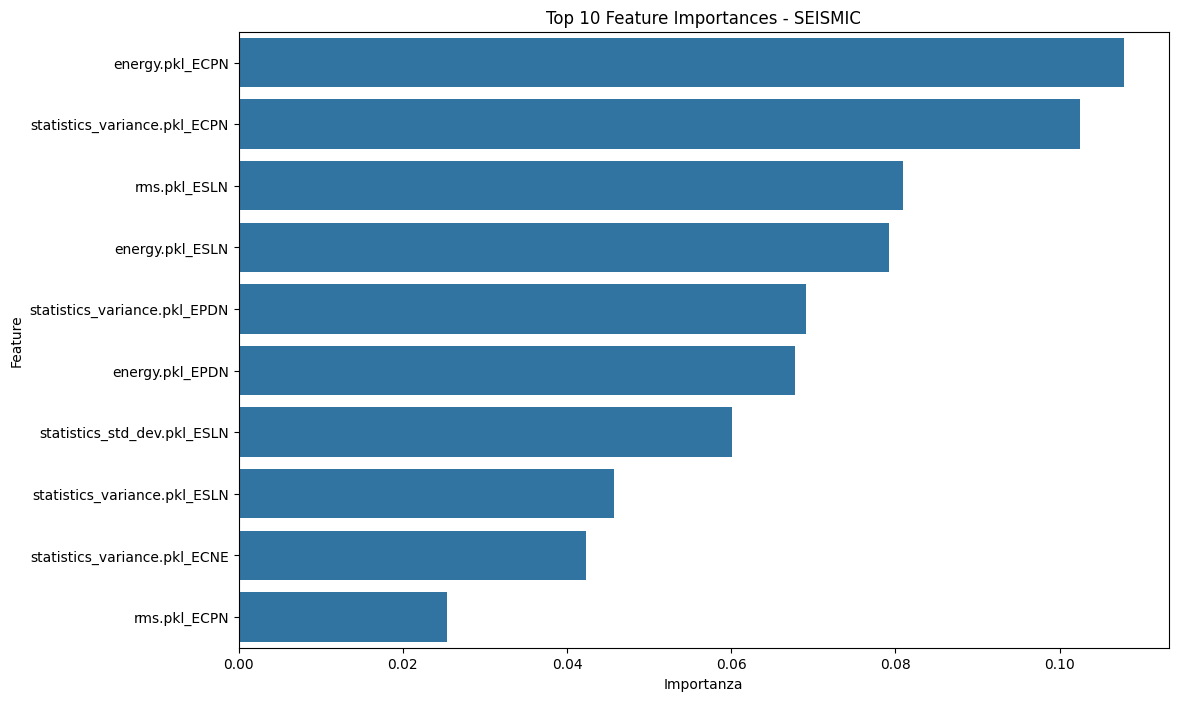

Valutazione del modello per SEISMIC...
Accuratezza del modello per SEISMIC: 99.74%
Caricamento delle feature per il tipo di dato TILT...
Accorpamento delle feature tra stazioni per TILT...
Addestramento del modello Random Forest per TILT...
Importanza delle feature per TILT:
                 Feature  Importance
0  tilt_x_Avg.pkl_ECBD_1         0.0
1  tilt_y_Avg.pkl_ECBD_1         0.0
2  tilt_x_Avg.pkl_ECPN_1         0.0
3  tilt_y_Avg.pkl_ECPN_1         0.0
4  tilt_x_Avg.pkl_EPDN_1         0.0
5  tilt_y_Avg.pkl_EPDN_1         0.0
6  tilt_x_Avg.pkl_EPLC_1         0.0
7  tilt_y_Avg.pkl_EPLC_1         0.0
Lista delle feature salvata in 'feature_importances_TILT.csv'.


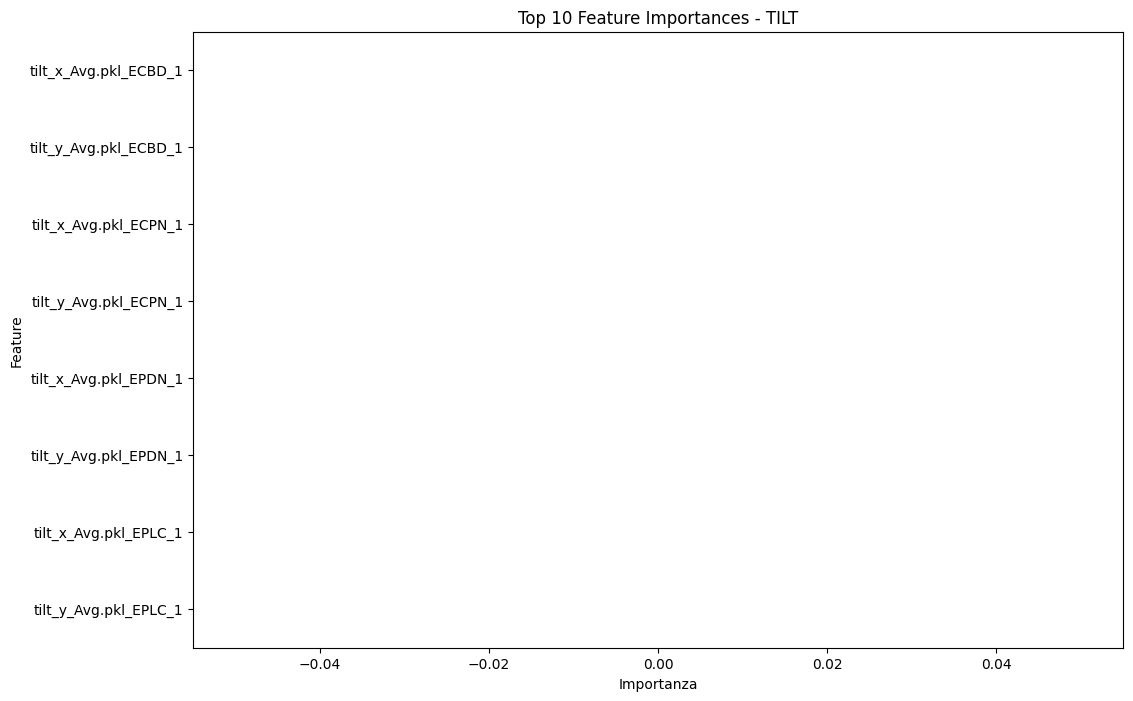

Valutazione del modello per TILT...
Accuratezza del modello per TILT: 100.00%


In [7]:
import pandas as pd
import numpy as np
import os
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from concurrent.futures import ThreadPoolExecutor

# Caricamento dei dati aggregati
BASE_PATH = "data/final"  # Directory principale (final/)
EVENTS_CSV = "data/csv_eruzioni/etichette_2021.csv"  # File CSV con start_time e end_time

# Carica gli eventi
paroxysms = pd.read_csv(EVENTS_CSV, parse_dates=["start_time", "end_time"])

# Funzione per verificare se un timestamp rientra in un evento parossistico
def is_paroxysm(timestamp, events):
    for _, row in events.iterrows():
        if row['start_time'] <= timestamp <= row['end_time']:
            return 1
    return 0

# Funzione per caricare un singolo file di feature
def process_feature_file(feature_path, station):
    try:
        df = pd.read_pickle(feature_path)
        feature_name = os.path.basename(feature_path).split('_cleaned.pkl')[0]
        if isinstance(df, pd.Series):  # Se il file è una Series
            df = df.to_frame(name=f"{feature_name}_{station}")
        elif isinstance(df, pd.DataFrame):  # Se è un DataFrame
            df.columns = [f"{feature_name}_{station}_{i}" for i in range(df.shape[1])]
        return df
    except Exception as e:
        print(f"Errore nel caricamento del file {feature_path}: {e}")
        return None


# Funzione per caricare tutte le feature da una directory organizzata per stazione e tipo di dato
def load_features(base_path, data_type):
    aggregated_features = {}

    data_type_path = os.path.join(base_path, data_type)
    if os.path.isdir(data_type_path):
        for station in os.listdir(data_type_path):  # ECPN, ECBD, etc.
            station_path = os.path.join(data_type_path, station)
            if os.path.isdir(station_path):
                feature_files = [os.path.join(station_path, f) for f in os.listdir(station_path) if f.endswith(".pkl")]

                with ThreadPoolExecutor(max_workers=4) as executor:
                    dfs = list(executor.map(lambda f: process_feature_file(f, station), feature_files))

                for df in dfs:
                    if df is not None:
                        for col in df.columns:
                            if col not in aggregated_features:
                                aggregated_features[col] = []
                            aggregated_features[col].append(df[col])

    if aggregated_features:  # Combina tutte le feature senza aggregare
        combined_df = pd.DataFrame({key: pd.concat(values) for key, values in aggregated_features.items()})
        numeric_combined_df = combined_df.select_dtypes(include=[np.number])
        return numeric_combined_df
    else:
        print(f"Attenzione: nessuna feature trovata per il tipo di dato {data_type}.")
        return pd.DataFrame()

# Funzione per addestrare il modello per un tipo di dato
def train_model_for_data_type(data_type):
    print(f"Caricamento delle feature per il tipo di dato {data_type}...")
    data = load_features(BASE_PATH, data_type)

    if not data.empty:
        print(f"Accorpamento delle feature tra stazioni per {data_type}...")

        # Converte l'indice in datetime se non lo è già
        if not isinstance(data.index, pd.DatetimeIndex):
            try:
                data.index = pd.to_datetime(data.index)
            except Exception as e:
                print(f"Errore nella conversione dell'indice a datetime: {e}")
                raise

        data['target'] = data.index.to_series().apply(lambda x: is_paroxysm(x, paroxysms))

        # Separazione delle feature (X) e del target (y)
        X = data.drop(columns=['target']).fillna(0)  # Sostituisci i NaN con 0 o un'altra strategia appropriata
        y = data['target']

        # Suddivisione del dataset in training e test
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

        # Modello Random Forest
        print(f"Addestramento del modello Random Forest per {data_type}...")
        rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
        rf_model.fit(X_train, y_train)

        # Importanza delle feature
        feature_importances = pd.DataFrame({
            'Feature': X.columns,
            'Importance': rf_model.feature_importances_
        }).sort_values(by='Importance', ascending=False)

        print(f"Importanza delle feature per {data_type}:")
        print(feature_importances)

        # Salva le feature per importanza in un CSV
        feature_importances.to_csv(f"feature_importances_{data_type}.csv", index=False)
        print(f"Lista delle feature salvata in 'feature_importances_{data_type}.csv'.")

        # Visualizza le feature più importanti
        plt.figure(figsize=(12, 8))
        sns.barplot(x='Importance', y='Feature', data=feature_importances.head(10))
        plt.title(f"Top 10 Feature Importances - {data_type}")
        plt.xlabel("Importanza")
        plt.ylabel("Feature")
        plt.show()

        # Valutazione del modello
        print(f"Valutazione del modello per {data_type}...")
        accuracy = rf_model.score(X_test, y_test)
        print(f"Accuratezza del modello per {data_type}: {accuracy * 100:.2f}%")
    else:
        print(f"Nessuna feature valida trovata per l'addestramento del modello {data_type}.")

# Addestra un modello per ciascun tipo di dato
for data_type in ["INFRA", "SEISMIC", "TILT"]:
    train_model_for_data_type(data_type)



Caricamento delle feature TILT...
Dimensioni: (525660, 48)
Colonne: ['tilt_x_Avg.pkl_ECBD_0', 'tilt_x_Avg.pkl_ECBD_1', 'tilt_x_Avg.pkl_ECBD_2', 'tilt_x_Avg.pkl_ECBD_0_delta', 'tilt_x_Avg.pkl_ECBD_1_delta', 'tilt_x_Avg.pkl_ECBD_2_delta', 'tilt_y_Avg.pkl_ECBD_0', 'tilt_y_Avg.pkl_ECBD_1', 'tilt_y_Avg.pkl_ECBD_2', 'tilt_y_Avg.pkl_ECBD_0_delta', 'tilt_y_Avg.pkl_ECBD_1_delta', 'tilt_y_Avg.pkl_ECBD_2_delta', 'tilt_x_Avg.pkl_ECPN_0', 'tilt_x_Avg.pkl_ECPN_1', 'tilt_x_Avg.pkl_ECPN_2', 'tilt_x_Avg.pkl_ECPN_0_delta', 'tilt_x_Avg.pkl_ECPN_1_delta', 'tilt_x_Avg.pkl_ECPN_2_delta', 'tilt_y_Avg.pkl_ECPN_0', 'tilt_y_Avg.pkl_ECPN_1', 'tilt_y_Avg.pkl_ECPN_2', 'tilt_y_Avg.pkl_ECPN_0_delta', 'tilt_y_Avg.pkl_ECPN_1_delta', 'tilt_y_Avg.pkl_ECPN_2_delta', 'tilt_x_Avg.pkl_EPDN_0', 'tilt_x_Avg.pkl_EPDN_1', 'tilt_x_Avg.pkl_EPDN_2', 'tilt_x_Avg.pkl_EPDN_0_delta', 'tilt_x_Avg.pkl_EPDN_1_delta', 'tilt_x_Avg.pkl_EPDN_2_delta', 'tilt_y_Avg.pkl_EPDN_0', 'tilt_y_Avg.pkl_EPDN_1', 'tilt_y_Avg.pkl_EPDN_2', 'tilt_y_Avg.pkl_

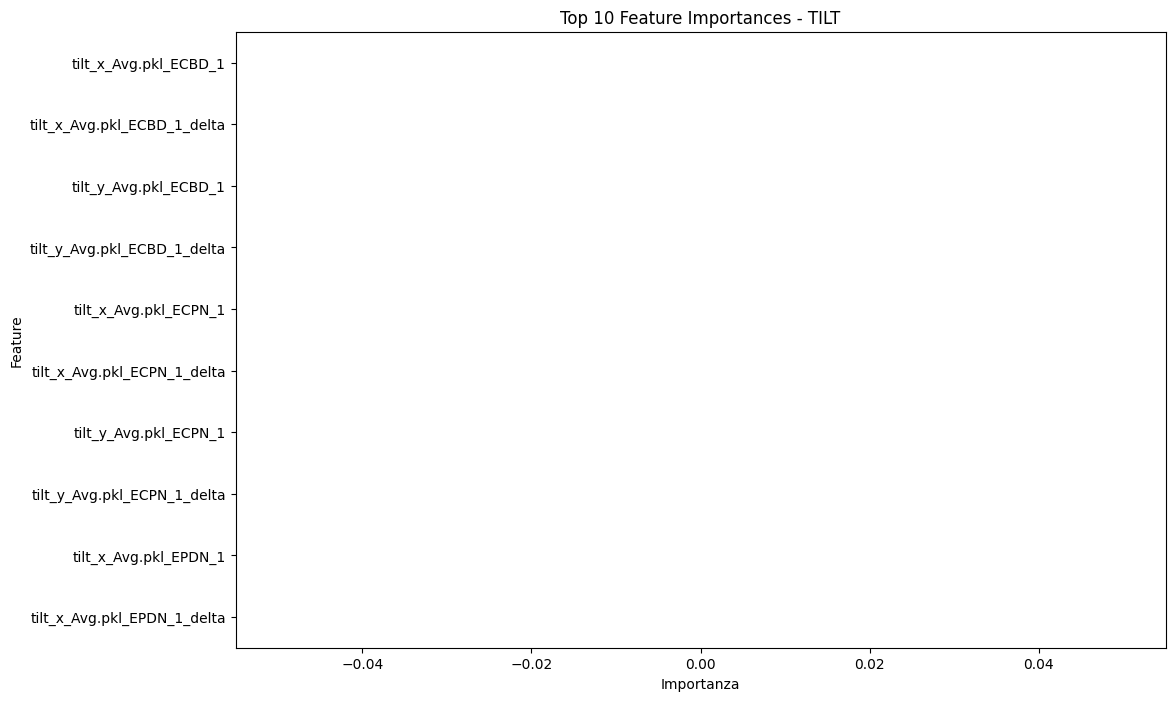

Valutazione del modello per TILT...
Accuratezza del modello per TILT: 100.00%


In [3]:
import pandas as pd
import numpy as np
import os
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from concurrent.futures import ThreadPoolExecutor

# Caricamento dei dati aggregati
BASE_PATH = "data/final"  # Directory principale (final/)
EVENTS_CSV = "data/csv_eruzioni/etichette_2021.csv"  # File CSV con start_time e end_time

# Carica gli eventi
paroxysms = pd.read_csv(EVENTS_CSV, parse_dates=["start_time", "end_time"])

# Funzione per verificare se un timestamp rientra in un evento parossistico
def is_paroxysm(timestamp, events):
    for _, row in events.iterrows():
        if row['start_time'] <= timestamp <= row['end_time']:
            return 1
    return 0

# Funzione per caricare un singolo file di feature con variazione delta
def process_feature_file_with_delta(feature_path, station):
    try:
        df = pd.read_pickle(feature_path)
        feature_name = os.path.basename(feature_path).split('_cleaned.pkl')[0]
        if isinstance(df, pd.Series):  # Se il file è una Series
            df = df.to_frame(name=f"{feature_name}_{station}")
        elif isinstance(df, pd.DataFrame):  # Se è un DataFrame
            df.columns = [f"{feature_name}_{station}_{i}" for i in range(df.shape[1])]

        # Convertire i valori in numerici
        df = df.apply(pd.to_numeric, errors='coerce')

        # Calcolo della variazione delta
        delta_df = df.diff().fillna(0)
        delta_df.columns = [f"{col}_delta" for col in df.columns]

        # Combina il dato originale e la variazione delta
        combined_df = pd.concat([df, delta_df], axis=1)
        return combined_df
    except Exception as e:
        print(f"Errore nel caricamento del file {feature_path}: {e}")
        return None

# Funzione per effettuare il debug dei dati
def debug_data(df):
    print(f"Dimensioni: {df.shape}")
    print(f"Colonne: {df.columns.tolist()}")
    print(f"Valori mancanti:\n{df.isnull().sum()}")
    print(f"Tipi di dato:\n{df.dtypes}")

# Funzione per rimuovere feature con varianza nulla
def remove_low_variance_features(df):
    return df.loc[:, df.var() > 0]

# Funzione per caricare tutte le feature del TILT
def load_tilt_features(base_path):
    aggregated_features = {}

    tilt_path = os.path.join(base_path, "TILT")
    if os.path.isdir(tilt_path):
        for station in os.listdir(tilt_path):  # ECPN, ECBD, etc.
            station_path = os.path.join(tilt_path, station)
            if os.path.isdir(station_path):
                feature_files = [os.path.join(station_path, f) for f in os.listdir(station_path) if f.endswith(".pkl")]

                with ThreadPoolExecutor(max_workers=4) as executor:
                    dfs = list(executor.map(lambda f: process_feature_file_with_delta(f, station), feature_files))

                for df in dfs:
                    if df is not None:
                        for col in df.columns:
                            if col not in aggregated_features:
                                aggregated_features[col] = []
                            aggregated_features[col].append(df[col])

    if aggregated_features:  # Combina tutte le feature senza aggregare
        combined_df = pd.DataFrame({key: pd.concat(values) for key, values in aggregated_features.items()})
        numeric_combined_df = combined_df.select_dtypes(include=[np.number])

        # Debug dei dati
        debug_data(numeric_combined_df)

        # Rimuovi feature con varianza nulla
        cleaned_df = remove_low_variance_features(numeric_combined_df)

        return cleaned_df
    else:
        print("Attenzione: nessuna feature TILT trovata.")
        return pd.DataFrame()

# Funzione per addestrare il modello solo per il TILT
def train_tilt_model():
    print("Caricamento delle feature TILT...")
    data = load_tilt_features(BASE_PATH)

    if not data.empty:
        print("Accorpamento delle feature TILT...")

        # Converte l'indice in datetime se non lo è già
        if not isinstance(data.index, pd.DatetimeIndex):
            try:
                data.index = pd.to_datetime(data.index)
            except Exception as e:
                print(f"Errore nella conversione dell'indice a datetime: {e}")
                raise

        data['target'] = data.index.to_series().apply(lambda x: is_paroxysm(x, paroxysms))

        # Separazione delle feature (X) e del target (y)
        X = data.drop(columns=['target']).fillna(0)  # Sostituisci i NaN con 0 o un'altra strategia appropriata
        y = data['target']

        # Standardizzazione delle feature
        scaler = StandardScaler()
        X_scaled = scaler.fit_transform(X)

        # Suddivisione del dataset in training e test
        X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

        # Modello Random Forest
        print("Addestramento del modello Random Forest per TILT...")
        rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
        rf_model.fit(X_train, y_train)

        # Importanza delle feature
        feature_importances = pd.DataFrame({
            'Feature': X.columns,
            'Importance': rf_model.feature_importances_
        }).sort_values(by='Importance', ascending=False)

        print("Importanza delle feature per TILT:")
        print(feature_importances)

        # Salva le feature per importanza in un CSV
        feature_importances.to_csv("feature_importances_TILT.csv", index=False)
        print("Lista delle feature salvata in 'feature_importances_TILT.csv'.")

        # Visualizza le feature più importanti
        plt.figure(figsize=(12, 8))
        sns.barplot(x='Importance', y='Feature', data=feature_importances.head(10))
        plt.title("Top 10 Feature Importances - TILT")
        plt.xlabel("Importanza")
        plt.ylabel("Feature")
        plt.show()

        # Valutazione del modello
        print("Valutazione del modello per TILT...")
        accuracy = rf_model.score(X_test, y_test)
        print(f"Accuratezza del modello per TILT: {accuracy * 100:.2f}%")
    else:
        print("Nessuna feature TILT valida trovata per l'addestramento del modello.")

# Esegui il training del modello TILT
train_tilt_model()
